<p><font size="4">  MOOC: Understanding queues</font></p>
<p><font size="4">  Python lab
</p></br>
<p><font size="4">  Week V: Multi server systems </p></br>

----------------------------

This lab focusses on multiserver queues. Numerical computations are peformed that illustrate the results obtained in the problems that we just studied.

---------

**1)** Let us consider an M/M/C/C queue with offered load $\rho$. Complete the code of function **p(rho,C)** that returns the vector of length $C+1$ that represents the stationary distribution of an M/M/C/C queue with $C$ servers 

In [1]:
%matplotlib inline              
from pylab import *          

In [2]:
# Calculation of the stationary distribution of an M/M/C/C
def p(rho,C):
    pi_   = ones(C+1)
    for k in range(C):
        #####################
        # supply the expression of pi_[k+1]
        # in terms of pi_[k]
        pi_[k+1] = rho**(k + 1) * pi_[0] / math.factorial(k + 1)
        #####################
    pi_ = pi_/sum(pi_)
    return pi_

#----------
V1 = p(1,4)[0]

**2)** Complete the code of the function **Eb(rho,C)** that implements 
the computation of the loss probability (Erlang B formula). Check that for the problem of the videoconference server where $\lambda=1$, $\mu=1$ and $C=4$ you find the same result as in the problem. 

In [3]:
#############
# Complete the code of Erlang B formula 
def Eb(rho,C):
    numerator = rho**C / math.factorial(C)
    denominator = sum([rho**i / math.factorial(i) for i in range(C+1)])
    return numerator / denominator
#############
lambda_, mu, C = 1., 1., 4
V2 = Eb(lambda_/mu,C)

**3)** Using the curves below that represent the loss probability $E_b$ vs the offered load, give the minimum values of $C$ for which the loss probability is lower than 3% and .5% respectively for $\rho=1$Erlang. Note that you can change the value of $C$ in the figure below by moving around the slider on top of it.

In [4]:
# Importing ipywidgets for interactive plotting
from ipywidgets import *

In [5]:
rcParams['figure.figsize'] = 10,7
def plt_Eb(C):
    # plot of rho -->Eb(rho,c)
    C_max   = 20
    rho_max = 4
    ymin    = 1.0e-7
    ymax    = 60
    rho     = linspace(0,rho_max,100)

    plot(rho, [100*Eb(r,C) for r in rho])
    grid('on')
    xlabel(r"Offered Load $\rho$", fontsize=20)
    ylabel(r"$E_B (\%)$", fontsize=20)
    title("Loss probability", fontsize=20)
    def point_loss(x,y,color,label):
        # point rho=x and loss_probability=y%
        semilogy(x,y,'o',color=color,label=label)
        semilogy((0,rho_max),(y,y),'r',linewidth=.4)
    semilogy((1,1),(ymin,ymax),'r',linewidth=.4)     
    # point of loss probability 1%
    point_loss(1,3,color='b',label=r'$E_B=3\%$')
    point_loss(1,.5,color='g',label=r'$E_B=0.5\%$')
    legend(fontsize=20)
    axis(xmin=0,xmax=rho_max,ymin=ymin,ymax=ymax)
    show()

# interactive plot of rho -->Eb(rho,c) for varying c
interact(plt_Eb, C=(1,10,1))

#######################
# supply the minimum values of C such that Eb<3% and Eb<.5%
V3 = 4   # min value of C such that Eb(1,C)<3%
V4 = 5   # min value of C such that Eb(1,C)<.5%
#######################

interactive(children=(IntSlider(value=5, description='C', max=10, min=1), Output()), _dom_classes=('widget-int…

**4)** Now, we are going to extend the results of the video conferencing system problem to the case where there can be subscribers and occasional clients and $C\geq 1$.

For instance, in the case $C=3$ states of the system are in the form $(a,b)$ with $0\leq a,b\leq 3$.

<img src="video_conf_C=3.png" height=500, width=700>

In this case, putting balance equations in the form $\pi {\bf Q}=0$ yields a generator matrix ${\bf Q}$ in the form

$$
{\bf Q} =\\
\begin{pmatrix}
-(\lambda+\lambda') &\lambda'&0&0&\lambda&0&0&0&0&0\\
\mu&-(\lambda+\lambda'+\mu)&\lambda'&0&0&\lambda&0&0&0&0\\
0&2\mu&-(\lambda+\lambda'+2\mu)&\lambda'&0&0&\lambda&0&0&0\\
0&0&3\mu&-(\lambda+3\mu)&0&0&\lambda&0&0&0\\
\mu&0&0&0&-(\lambda+\lambda'+\mu)&\lambda'&0&\lambda&0&0\\
0&\mu&0&0&\mu&-(\lambda+\lambda'+2\mu)&\lambda'&0&\lambda&0\\
0&0&\mu&0&0&2\mu&-(\lambda+3\mu)&0&\lambda&0\\
0&0&0&0&2\mu&0&0&-(\lambda+\lambda'+2\mu)&\lambda'&\lambda\\
0&0&0&0&0&2\mu&0&\mu&-(\lambda+3\mu)&\lambda\\
0&0&0&0&0&0&0&3\mu&0&-3\mu\\
\end{pmatrix}
$$

where $[{\bf Q}]_{ij}$ is the entry $(i,j)$ of ${\bf Q}$ that denotes transition intensity from state $(a,b)$ to state $(c,d)$ with $i=(a(C+1)-a(a-1)/2+b$ and $j=c(C+1)-c(c-1)/2+d$ for $i\neq j$ and $[{\bf Q}]_{ii}=-\sum_{j\neq i}[{\bf Q}]_{ij}$. The general implementation of matrix ${\bf Q}$ is given in function **matQ(lambda_s,mu,lambda_o,C)** below where **lambda_s** and **lambda_o** stand for the intensity of arrivals  of subscribers ($\lambda$) and occasional customers ($\lambda'$). Complete the code of the function and check that for $C=3$ we find the expression given above here for ${\bf Q}$. 

In [6]:
def ab_to_i(a,b):
    # index conversion (a,b)-->i
    # (a,b) stands for the state (N,N') 
    # and i for the corresponding line or column index of Q
    # note that matrix and state pairs indexing begin at 0
    return int(a*(C+1)-a*(a-1)/2 + b)

def matQ(lambda_s,mu,lambda_o,C):
    # building Q
    s = int((C+1)**2-C*(C+1)/2)
    Q = zeros(shape=(s,s))
    for a in range(C+1):       # loop over N
        for b in range(C+1-a): # loop over N'
            i = ab_to_i(a,b)   # corresponding index in the matrix Q
            if b>0: # transition (a,b)-->(a,b-1)
                Q[i,ab_to_i(a,b-1)]     = b*mu 
            if a>0: # transition (a,b)-->(a-1,b)
                Q[i,ab_to_i(a-1,b)]     = a*mu 
            if b<C-a: # transition (a,b)-->(a,b+1)
                Q[i,ab_to_i(a,b+1)]     = lambda_o 
                if i<s-1: # transition (a,b)-->(a+1,b)
                    Q[i,ab_to_i(a+1,b)] = lambda_s 
            elif i<s-1: # transition (a,C-a)-->(a+1,C-a-1)
                Q[i,ab_to_i(a+1,b-1)]   = lambda_s      
            ############################
            # Supply the value of Q[i,i]
            Q[i,i] = 0 - sum(Q[i,:])  # setting constraint sum(Q[i,:])=0
            ############################
    return Q

lambda_s,mu,lambda_o,C = 1,1,2,3
matQ(lambda_s,mu,lambda_o,C)

array([[-3.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -4.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  2., -5.,  2.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  3., -4.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0., -4.,  2.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  1., -5.,  2.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  2., -4.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  2.,  0.,  0., -5.,  2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  2.,  0.,  1., -4.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0., -3.]])

**5)** For $C=4$, let us compute the stationary distribution $\pi_Q$ of the system from equations $\pi_Q{\bf Q}=0$ and $\sum_i \pi_Q[i]=1$ (two techniques are provided below). From $\pi_Q$, compute the blocking probability for $N$ and for $N'$.

In [7]:
# to solve overdetermined systems of equations Ax=b
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq
from scipy.linalg import lstsq

In [8]:
set_printoptions(precision=4)
lambda_s,mu,lambda_o,C = 1,1,2,4
A     = matQ(lambda_s,mu,lambda_o,C).T
m,n   = A.shape
A     = vstack((A,ones(n))) # adding constraint sum(pi[i])=1
b     = zeros(m+1)
b[-1] = 1
# solves equations pi.Q=0 and normalization condition
pi_Q  = lstsq(A,b)[0] 
##########################
# supply the blocking probability for for suscribers 
# and occasional users
def blocking(pi_Q,C):
    #returns blocking probability for suscribers (P_s)
    # and occasional users (P_o)
    # blocking probability = P(all servers busy) = Pi_c
    # 0 1 2 3 4
    # 5 6 7 8
    # 9 10 11
    # 12 13
    # 14
    # sum all states where all servers are busy with only subscribing users aka state 14
    P_s = pi_Q[-1] 
    # sum all states where all servers are busy (N + N' = C)
    temp = C
    tot = C
    P_o = 0
    while temp >= 0:
        P_o += pi_Q[tot]
        tot = tot + temp
        temp = temp - 1
    return P_s, P_o
##########################
V5,V6 = blocking(pi_Q,C)
print("The blocking probability for N  is %.3f" %V5)
print('Erlang B formula yields Eb(',lambda_s/mu,',',C,
                          ') = %.3f' %Eb(lambda_s/mu,C))
print("The blocking probability for N' is %.3f" %V6)

The blocking probability for N  is 0.015
Erlang B formula yields Eb( 1.0 , 4 ) = 0.015
The blocking probability for N' is 0.206


Until now, we have considered the case $C=4$. Le t us show the influence of $C$ on blocking probabilities for subscribers and occasional customers. As expected blocking probabilities for subscribers remains lower than that of  occasional customers and both blocking probabilities decrease to 0 as $C$ increases. 

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Blocking probability')

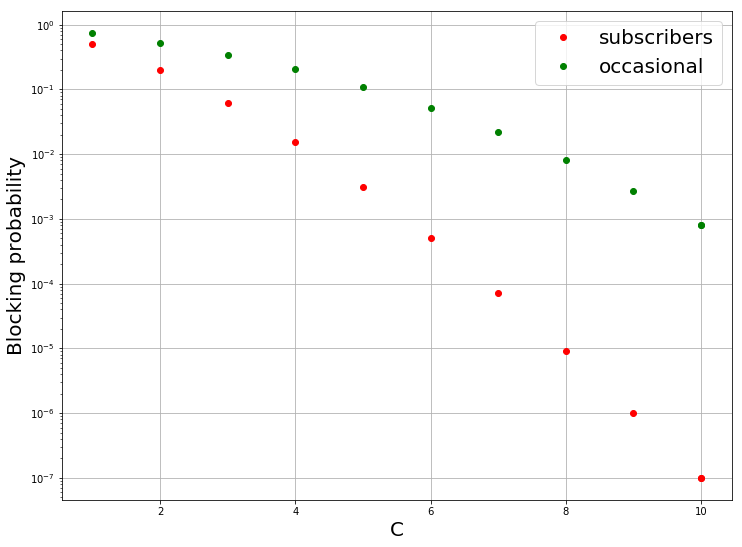

In [9]:
Cmax = 10
rcParams["figure.figsize"] = 12,9
for C in range(1,Cmax+1):
    A     = matQ(lambda_s,mu,lambda_o,C).T
    m,n   = A.shape
    A     = vstack((A,ones(n))) # adding constraint sum(pi[i])=1
    b     = zeros(m+1)
    b[-1] = 1
    # solves equations pi.Q=0 and normalization condition
    pi_Q  = lstsq(A,b)[0] 
    P_s,P_o = blocking(pi_Q,C)
    semilogy(C,P_s,'or')
    semilogy(C,P_o,'og')
semilogy(C,P_s,'or',label='subscribers')
semilogy(C,P_o,'og',label='occasional')
grid('on')
legend(fontsize=20)
xlabel('C',fontsize=20)
ylabel('Blocking probability',fontsize=20)

# Conclusion

In this lab, we have confirmed the interest of using several servers in queuing systems. At the end of this week you probably have become quite familiar with tweacking the code to deal with a few standard or more advanced queuing systems. 

Here we are! We hope that you found these labs helpful for understanding queues and possibly set up your own simulation experiments of queueing systems.

# Your answers for the exercise

In [10]:
print("---------------------------\n"
      +"RESULTS SUPPLIED FOR LAB 5:\n"
      +"---------------------------")
results = ("V"+str(k) for k in range(1,7))
for x in results:
    try:
        print(x+" = {0:.3f}".format(eval(x)))
    except:
        print(x+": variable is undefined")   

---------------------------
RESULTS SUPPLIED FOR LAB 5:
---------------------------
V1 = 0.369
V2 = 0.015
V3 = 4.000
V4 = 5.000
V5 = 0.015
V6 = 0.206
